## 1. Library Imports

In [1]:
## imports

import seaborn as sns
import matplotlib.pyplot as plt
# from pylab import rcParams

import pandas as pd
import nltk
from itertools import chain
from collections import Counter
from nltk.corpus import stopwords
from pprint import pprint
from polyglot.detect import Detector
from polyglot.detect.base import UnknownLanguage
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display

## 2. Utility Functions

In [2]:
def lang_detect_polyglot(text):
    text = str(text)
    text = text.strip('\n ')
    if len(text)>=3:
        try:
            detector = Detector(text)
            lang_code = detector.language.code
            return lang_code
        except UnknownLanguage:
            return 'UNK'
        except:
            return 'ERROR'
    else:
        return 'SHORT_LEN'
    
def eda_basic(df,input_col,output_col):
    print("No of rows: {}".format(df.shape[0]))
    print("No of column: {}".format(df.shape[1]))
    print("Dtype of column - {}: {}".format(input_col,df[input_col].dtype))
    print("Dtype of column - {}: {}".format(output_col,df[output_col].dtype))
    print("Number of Null values in column - {}: {}".format(input_col, pd.isnull(df[input_col]).sum()))
    print("Number of Null values in column - {}: {}".format(output_col, pd.isnull(df[output_col]).sum()))
    print("#"*50)
    print("Total unique label - {}".format(df[output_col].nunique()))
    print("Distribution of column - {}: \n {} \n or {}".format(output_col,df[output_col].value_counts(),\
                                                            df[output_col].value_counts(normalize = True)))
    print("#"*50)
    assert df[input_col].dtype == type(str)
    print("Checks on Length of column - {}:\n {}".format(input_col,\
                df[input_col].apply(len).describe(percentiles = [0.80,0.85,0.90,0.95,0.97,0.99])))
    print("#"*50)
    all_words = list(chain(*df[input_col].str.lower().str.strip("?.").apply(lambda x: x.split())))
    print("Total words in data - {}, Unique words in data - {}".format(len(all_words),len(set(all_words))))
    all_stopword_rem = [i for i in all_words if i not in stopwords.words('english')]
    ## To-do: Mention percentage, custom list of stop-words
    print("After removing stopwords, Total words in data - {}, Unique words in data - {}".format(\
                                                len(all_stopword_rem),len(set(all_stopword_rem))))
    ## To-do: Can design word cloud for each class
    print("Top 10 occuring words in data: {}".format(Counter(all_stopword_rem).most_common(20)))
    print("#"*50)
    print("Least 10 occuring words in data: {}".format(list(reversed(\
                                            Counter(all_stopword_rem).most_common()[-20:]))))
    df['lang'] = df[input_col].apply(lang_detect_polyglot)
    print("Language Distribution - {}".format(df['lang'].value_counts()))    

## 3. Read Train and Test File

In [3]:
df_train = pd.read_csv("../input/data/v2/train/sofmattress_train.csv")
df_test = pd.read_csv("../input/data/v2/test/sofmattress_test.csv")

In [14]:
display(df_train.head(5))
display(df_test.head())

,sentence,label,lang
0,You guys provide EMI option?,EMI,en
1,Do you offer Zero Percent EMI payment options?,EMI,en
2,0% EMI.,EMI,yo
3,EMI,EMI,yo
4,I want in installment,EMI,en


,sentence,label,lang
0,There are only 2 models,NO_NODES_DETECTED,en
1,Single,NO_NODES_DETECTED,en
2,What's difference between ergo and ortho,COMPARISON,en
3,Return order,RETURN_EXCHANGE,en
4,Hai not recieved my product,DELAY_IN_DELIVERY,en


### 4.1 EDA - Label check

In [5]:
print("Labels present in Training data but not in Test data: {}".format(\
                            list(set(df_train['label'].unique()).difference(df_test['label'].unique()))))
print("Labels present in Test data but not in Training data: {}".format(\
                            list(set(df_test['label'].unique()).difference(df_train['label'].unique()))))

Labels present in Training data but not in Test data: ['WARRANTY']
Labels present in Test data but not in Training data: ['NO_NODES_DETECTED']


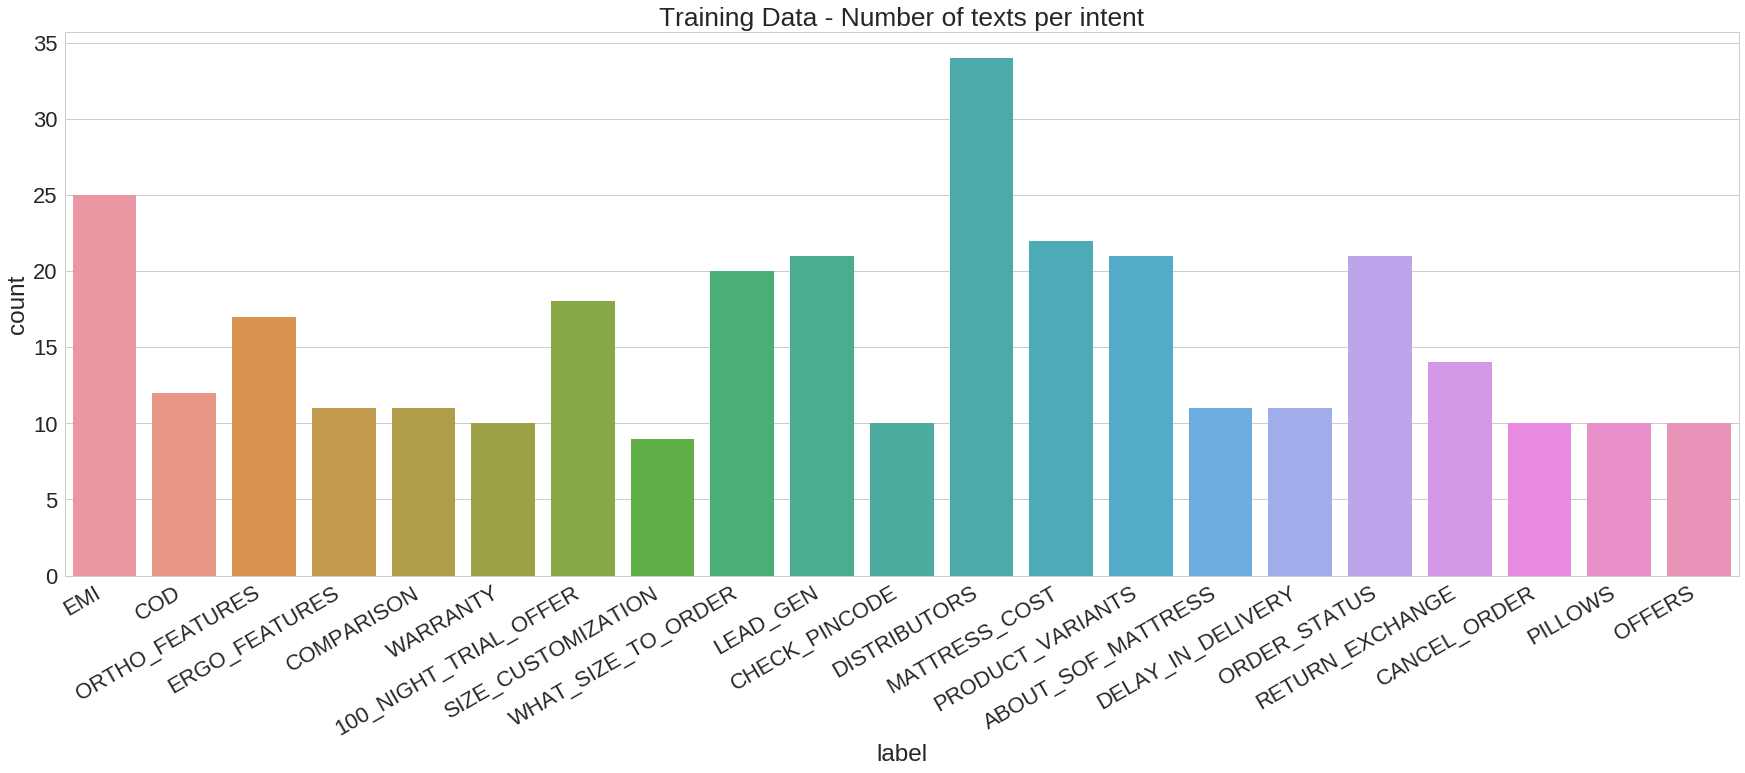

In [7]:
## Training Data
sns.set(style='whitegrid', font_scale=2.2)
plt.rcParams["figure.figsize"] = (30,10)
chart = sns.countplot(df_train.label)
plt.title("Training Data - Number of texts per intent")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
plt.show()

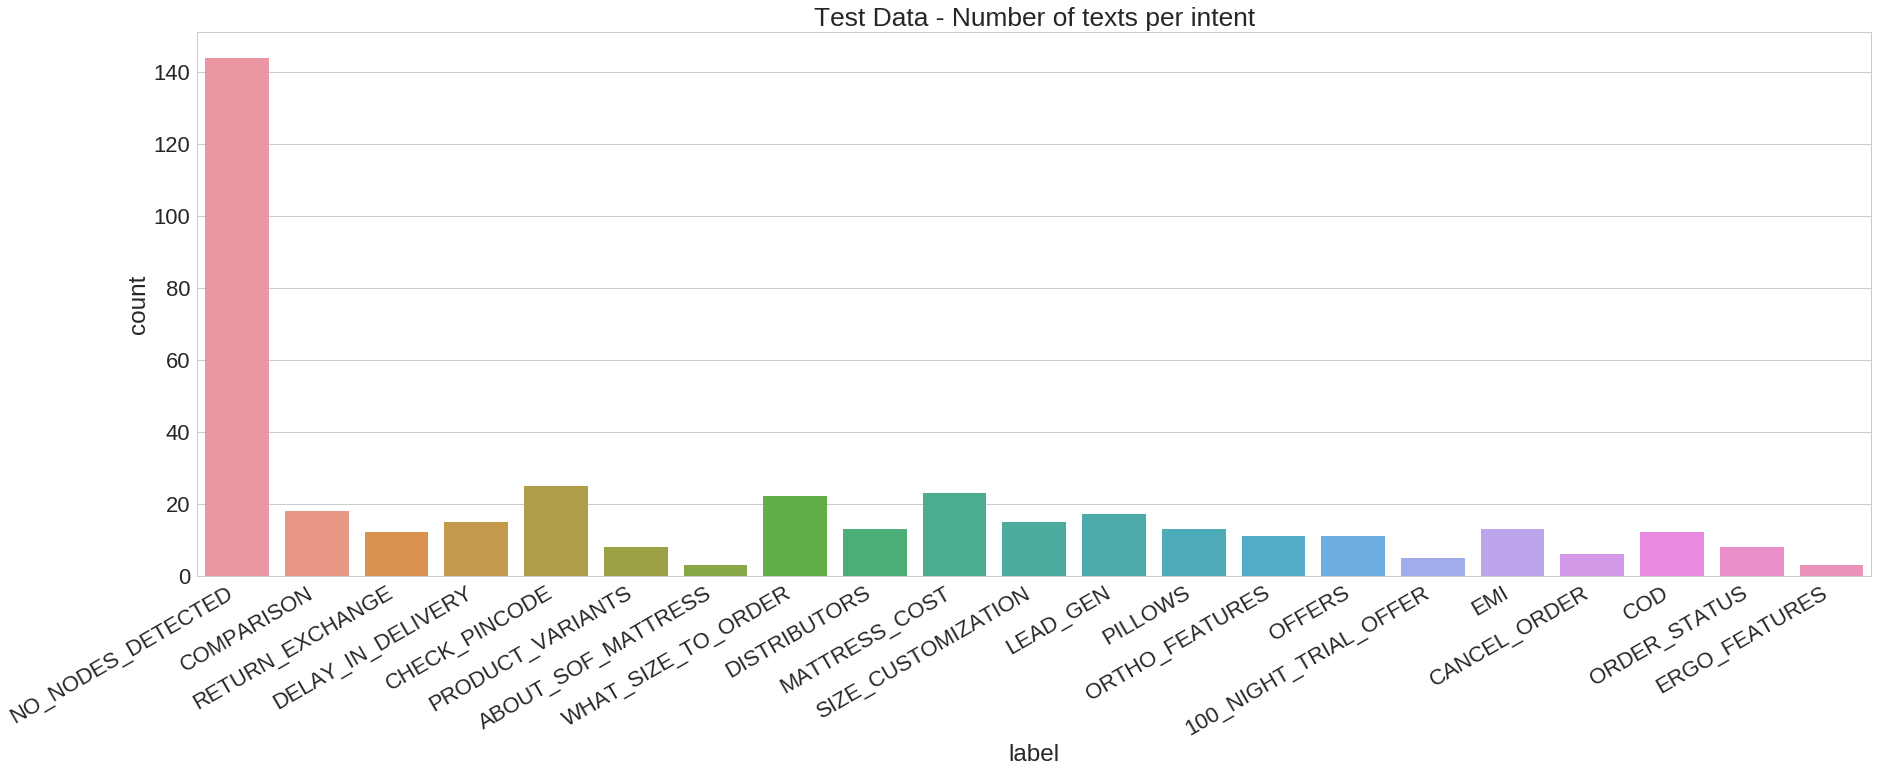

In [8]:
## Test Data
sns.set(style='whitegrid', font_scale=2.2)
plt.rcParams["figure.figsize"] = (30,10)
chart = sns.countplot(df_test.label)
plt.title("Test Data - Number of texts per intent")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');
plt.show()

### 4.2 EDA - Basic (Training and Test)

* **Count** - Row, Column, Null
* Dtype Check
* **Distribution**
    * 'label' Column
    * Length of 'sentence' column
    * Language of 'sentence' column (Need to see for Hinglish) - Used Polyglot, can also try with facebook one, Textblob

* **Vocabulary** - Before and After removing Stopwords 
* To-Do (Ideas)
    * **OOV (Out of Vocabulary)** - Say, we using DistillBERT, check intersection of vocab and training data vocab
    * Is **Sub-Word** information important because of spelling mistakes (matterss)?
    * **Slang Words** Check (Plz, lyk)
    * **Hinglish** -- May be Multi-Lingual Embeddings helpful
    * Candidate features if we devlop manual one - Length (Char and word level), Numerical or not, Feature level Embedding 

In [9]:
print("Training data EDA:")
eda_basic(df = df_train, input_col = 'sentence',\
          output_col = 'label')

Training data EDA:
No of rows: 328
No of column: 2
Dtype of column - sentence: object
Dtype of column - label: object
Number of Null values in column - sentence: 0
Number of Null values in column - label: 0
##################################################
Total unique label - 21
Distribution of column - label: 
 DISTRIBUTORS             34
EMI                      25
MATTRESS_COST            22
PRODUCT_VARIANTS         21
LEAD_GEN                 21
ORDER_STATUS             21
WHAT_SIZE_TO_ORDER       20
100_NIGHT_TRIAL_OFFER    18
ORTHO_FEATURES           17
RETURN_EXCHANGE          14
COD                      12
DELAY_IN_DELIVERY        11
ABOUT_SOF_MATTRESS       11
COMPARISON               11
ERGO_FEATURES            11
CHECK_PINCODE            10
OFFERS                   10
WARRANTY                 10
CANCEL_ORDER             10
PILLOWS                  10
SIZE_CUSTOMIZATION        9
Name: label, dtype: int64 
 or DISTRIBUTORS             0.103659
EMI                      0.0762

No handlers could be found for logger "polyglot.detect.base"


In [10]:
print("Test data EDA:")
eda_basic(df = df_test, input_col = 'sentence',\
          output_col = 'label')

Test data EDA:
No of rows: 397
No of column: 2
Dtype of column - sentence: object
Dtype of column - label: object
Number of Null values in column - sentence: 0
Number of Null values in column - label: 0
##################################################
Total unique label - 21
Distribution of column - label: 
 NO_NODES_DETECTED        144
CHECK_PINCODE             25
MATTRESS_COST             23
WHAT_SIZE_TO_ORDER        22
COMPARISON                18
LEAD_GEN                  17
DELAY_IN_DELIVERY         15
SIZE_CUSTOMIZATION        15
EMI                       13
PILLOWS                   13
DISTRIBUTORS              13
RETURN_EXCHANGE           12
COD                       12
OFFERS                    11
ORTHO_FEATURES            11
PRODUCT_VARIANTS           8
ORDER_STATUS               8
CANCEL_ORDER               6
100_NIGHT_TRIAL_OFFER      5
ERGO_FEATURES              3
ABOUT_SOF_MATTRESS         3
Name: label, dtype: int64 
 or NO_NODES_DETECTED        0.362720
CHECK_PINCODE 

In [11]:
df_train['lang'] = df_train['sentence'].apply(lang_detect_polyglot)

df_train[df_train['lang']=='UNK']

,sentence,label,lang
119,6*3,WHAT_SIZE_TO_ORDER,UNK
155,Check pincode,CHECK_PINCODE,UNK
185,Offline stores,DISTRIBUTORS,UNK
